In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

### Definition of the model

In [5]:
# The SEIR model differential equations.
def deriv_SEIR(y, t, N, beta,gamma,sigma,mu,nu):
    S,E,I,R = y

    #mearning of the parameter
    # beta: The parameter controlling how often a susceptible-infected contact results in a new exposure.
    # gamma: The rate an infected recovers and moves into the resistant phase.
    # sigma: The rate at which an exposed person becomes infective.
    # mu: The natural mortality rate (this is unrelated to disease). This models a population of a constant size
    # nu: the fraction of vaccinated people
    
    dSdt = mu*(N-S) -(beta*I/N)*S  - nu*S
    dEdt = (beta*S/N)*I  - (mu + sigma) * E
    dIdt = sigma*E - (mu + gamma)*I
    dRdt = gamma*I - mu*R + nu*S
    
    return dSdt, dEdt, dIdt, dRdt

def SEIR(N,beta,gamma,sigma,mu,nu,E0=0,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 denotes the number of initial infected people (I0) 
    # E0 the number of people initally exposed to the virus
    # R0 the number of people that removed from the system (R0)  (recovered + deaths)
    
    # t ise the timegrid
    
    S0=N-I0-R0-E0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, E0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv_SEIR, y0, t, args=(N,beta,gamma,sigma,mu,nu))
    S, E, I, R = np.transpose(ret)
    
    return (t,S,E,I,R)

### Show the result

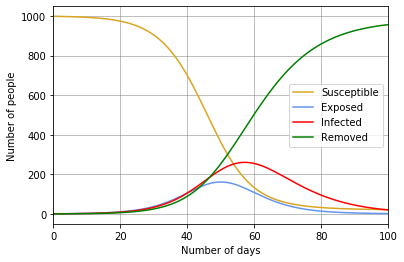

In [16]:
fin_result=SEIR(1000,0.4,0.1,1/5,0,0)

t=fin_result[0]
s_vec=fin_result[1]
e_vec=fin_result[2]
i_vec=fin_result[3]
r_vec=fin_result[4]

plt.plot(t, s_vec, color='goldenrod', label='Susceptible')
plt.plot(t, e_vec, color='cornflowerblue',label='Exposed')
plt.plot(t, i_vec, 'r', label='Infected')
plt.plot(t, r_vec, 'g', label='Removed')
plt.legend()
plt.xlim(0,100)
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.savefig('SEIR-example.png',dpi=300)
plt.show()